In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
neighbourhoods = gpd.read_file("../shapefiles/ONS/ons.shp")
neighbourhoods.head()

,FID,flag,ONS_ID,Name,POPEST,Name_FR,Shape__Are,Shape__Len,geometry
0,1,0,938,Old Barrhaven West,16880,Old Barrhaven Ouest,1.030476e+07,15745.394276,"POLYGON ((-75.77100 45.26216, -75.77364 45.260..."
1,2,1,3,Beacon Hill South - Cardinal Heights,7195,Beacon Hill Sud - Cardinal Heights,4.533907e+06,10362.452308,"POLYGON ((-75.58543 45.44887, -75.58545 45.448..."
2,3,0,902,Beaverbrook,6715,None,5.744251e+06,10135.952452,"POLYGON ((-75.90837 45.33448, -75.90828 45.334..."
3,4,1,6,Bells Corners East,4729,Bells Corners Est,6.786858e+06,11170.923795,"POLYGON ((-75.80921 45.33091, -75.80895 45.330..."
4,5,1,7,Bells Corners West,4158,Bells Corners Ouest,2.772272e+06,7467.061209,"POLYGON ((-75.82832 45.31327, -75.82823 45.313..."


In [3]:
hospitals = gpd.read_file("../shapefiles/OttawaHospitals/Hospitals.shp")
hospitals.head()

,OBJECTID,ID,NAME,ADDRESS,PHONE,LINK_LABEL,LINK_EN,LINK_DESCR,LINK_LAB_1,LINK_FR,GLOBALID,ADDRESS_FR,NAME_FR,geometry
0,1,1,Royal Ottawa Hospital,1145 Carling Avenue,722-6521,None,http://www.theroyal.ca/,None,None,http://www.leroyal.ca/,{E279DD71-C8D3-4C76-B317-1ACF4DB9281A},"1145, avenue Carling",HÃ´pital Royal Ottawa,POINT Z (-75.73236 45.38809 0.00000)
1,2,2,Ottawa Hospital - Civic Campus,1053 Carling Avenue,761-4000,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{C1661EEA-B6C5-4C11-9789-E5353940777A},"1053, avenue Carling",HÃ´pital dâOttawa â Campus Civic,POINT Z (-75.72121 45.39267 0.00000)
2,3,3,Ottawa Hospital - Riverside Campus,1967 Riverside Drive,738-7100,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{7A30AEC4-D042-41D6-9CF1-D06F6202137F},"1967, promenade Riverside","HÃ´pital dâOttawa, campus Riverside",POINT Z (-75.66794 45.39675 0.00000)
3,4,4,Children's Hospital of Eastern Ontario,401 Smyth Road,737-7600,None,http://www.cheo.on.ca/,None,None,http://www.cheo.on.ca/fr/home,{93E3EACA-FB11-49E9-A914-0D5E8B5CBF7B},"401, chemin Smyth",Centre hospitalier pour enfants de l'est de l'Ont,POINT Z (-75.65192 45.40102 0.00000)
4,5,5,Ottawa Hospital - General Campus,501 Smyth Road,737-7777,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{CC861544-A63C-4A64-89DA-65BC7274827E},"501, chemin Smyth",HÃ´pital dâOttawa â Campus GÃ©nÃ©ral,POINT Z (-75.64764 45.40099 0.00000)


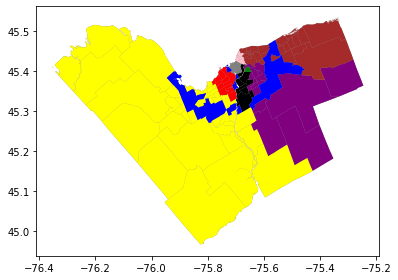

In [4]:
# Best to use this CRS when dealing with distance
qualicum = neighbourhoods[neighbourhoods.Name == "Qualicum - Redwood Park"].to_crs(epsg=3857)
royal_hospital = hospitals[hospitals.NAME == "Royal Ottawa Hospital"].to_crs(epsg=3857)

# Quick brute force approach. Not the most efficient code, but it gets the job done...
# May take a few minutes to run
closest_hospitals = []

# Check each neighbourhood
for n in neighbourhoods.Name:
    closest = -1;
    close_h = ""
    
    nx = neighbourhoods[neighbourhoods.Name == n].to_crs(epsg=3857)
    
    n_lon = nx.geometry.centroid.x.iloc[0]
    n_lat = nx.geometry.centroid.y.iloc[0]
    
    nx = gpd.GeoSeries([Point(n_lon, n_lat)])
            
    # Check each hospital
    for h in hospitals.NAME:
        hx = hospitals[hospitals.NAME == h].to_crs(epsg=3857)
        
        h_lon = hx.geometry.centroid.x.iloc[0]
        h_lat = hx.geometry.centroid.y.iloc[0]
        
        hx = gpd.GeoSeries([Point(h_lon, h_lat)])
            
        dist = hx.distance(nx)
        
        if(closest <= 0 or dist[0] <= closest):
            closest = dist[0]
            closest_h = h
            
    closest_hospitals.append([n, closest_h, round(closest/1000, 2)])

h = {hospitals.NAME[0]: 'red',
     hospitals.NAME[1]: 'blue',
     hospitals.NAME[2]: 'black',
     hospitals.NAME[3]: 'orange',
     hospitals.NAME[4]: 'purple',
     hospitals.NAME[5]: 'brown',
     hospitals.NAME[6]: 'yellow',
     hospitals.NAME[7]: 'green',
     hospitals.NAME[8]: 'gray',
     hospitals.NAME[9]: 'pink'}

fig, ax = plt.subplots()
neighbourhoods.plot(ax=ax, facecolor='gray');
for ch in closest_hospitals:
    nx = neighbourhoods[neighbourhoods.Name == ch[0]]
    nx.plot(ax=ax, facecolor=h[ch[1]])
plt.tight_layout();